In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Define paths to the dataset
train_dir = r"C:\Users\71591\Desktop\dataset\training_set"
test_dir = r"C:\Users\71591\Desktop\dataset\test_set"


In [3]:
# Set up ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Normalize pixel values
    shear_range=0.2,           # Shear for data augmentation
    zoom_range=0.2,            # Zoom augmentation
    horizontal_flip=True       # Flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

# Load training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),      # Resize all images to 64x64
    batch_size=32,             # Batch size
    class_mode='binary'        # Binary classification: Cats vs Dogs
)

# Load test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Display class indices
print("Class Indices:", train_data.class_indices)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Class Indices: {'cats': 0, 'dogs': 1}


In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Display the model architecture
model.summary()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the CNN model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss='binary_crossentropy',          # Binary cross-entropy for binary classification
    metrics=['accuracy']                 # Evaluate model performance using accuracy
)

print("Model compiled successfully!")


Model compiled successfully!


In [6]:
# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

# Train the CNN model
history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,  # Adjusted steps
    epochs=10,                        # Number of epochs
    validation_data=test_data,        # Validation data
    validation_steps=validation_steps # Adjusted steps
)

print("Model training completed!")


Epoch 1/10


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 164s 638ms/step - accuracy: 0.5196 - loss: 0.6941 - val_accuracy: 0.5794 - val_loss: 0.6782
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.6250 - loss: 0.6730 - val_accuracy: 0.2857 - val_loss: 0.7242
Epoch 3/10


C:\Users\71591\AppData\Local\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.5724 - loss: 0.6782 - val_accuracy: 0.6171 - val_loss: 0.6407
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.6562 - loss: 0.5986 - val_accuracy: 0.7143 - val_loss: 0.5243
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.6425 - loss: 0.6302 - val_accuracy: 0.7014 - val_loss: 0.5801
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.5625 - loss: 0.6750 - val_accuracy: 0.7143 - val_loss: 0.5627
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.6847 - loss: 0.5975 - val_accuracy: 0.7098 - val_loss: 0.5655
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.7812 - loss: 0.4957 - val_accuracy: 0.5714 - val_loss: 0.7992
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7251 - loss: 0.5481 - val_accuracy: 0.7465 - val_loss: 0.5120
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.5000 - loss: 0.8099 - val_accuracy: 

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, steps=validation_steps)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7436 - loss: 0.5063
Test Accuracy: 75.00%


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


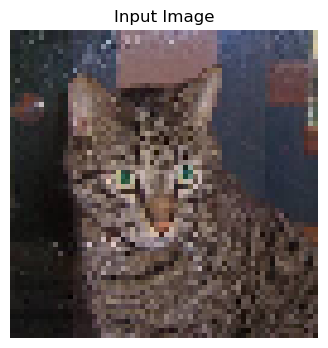

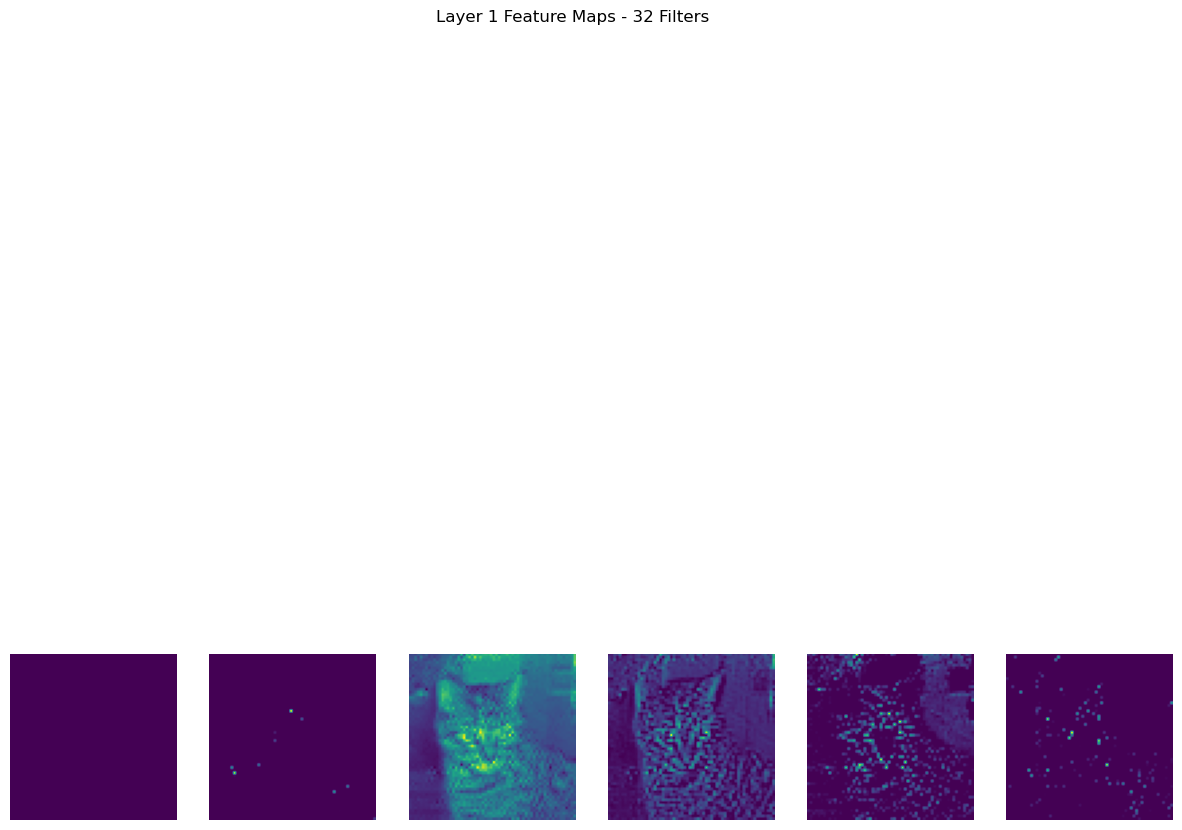

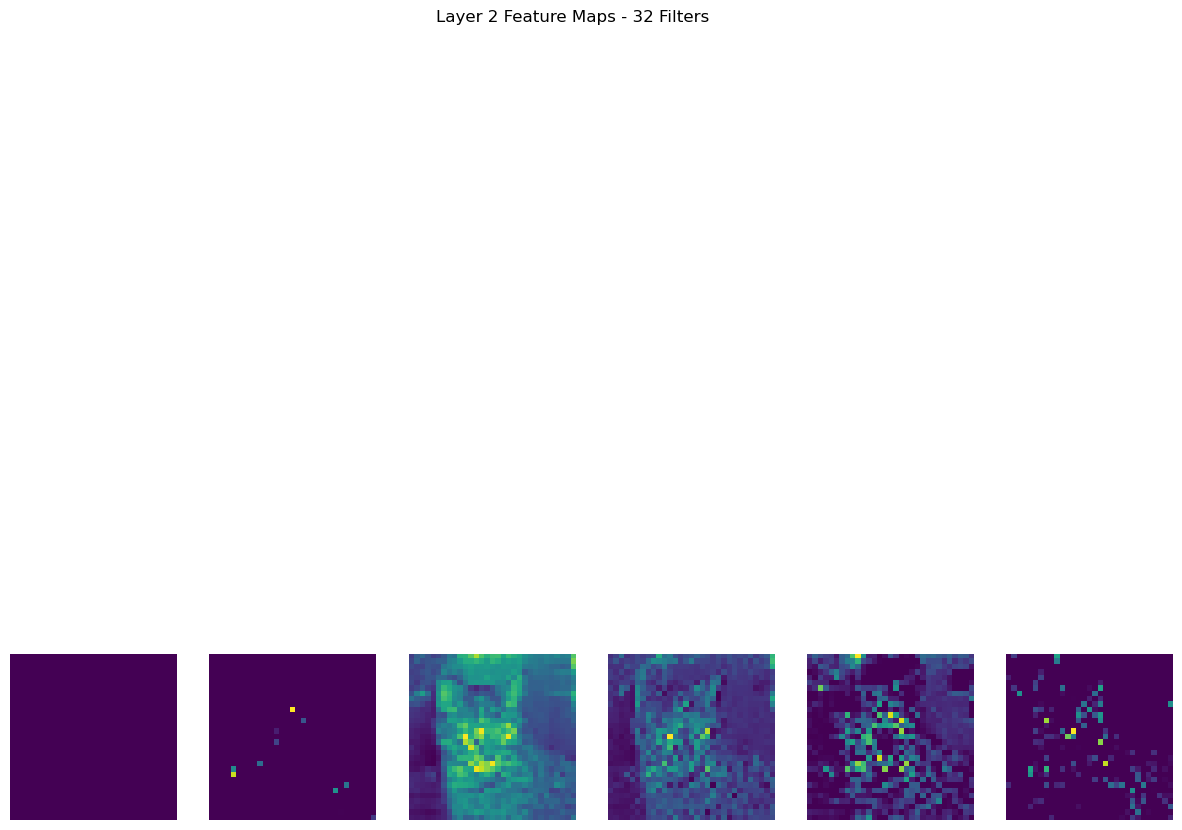

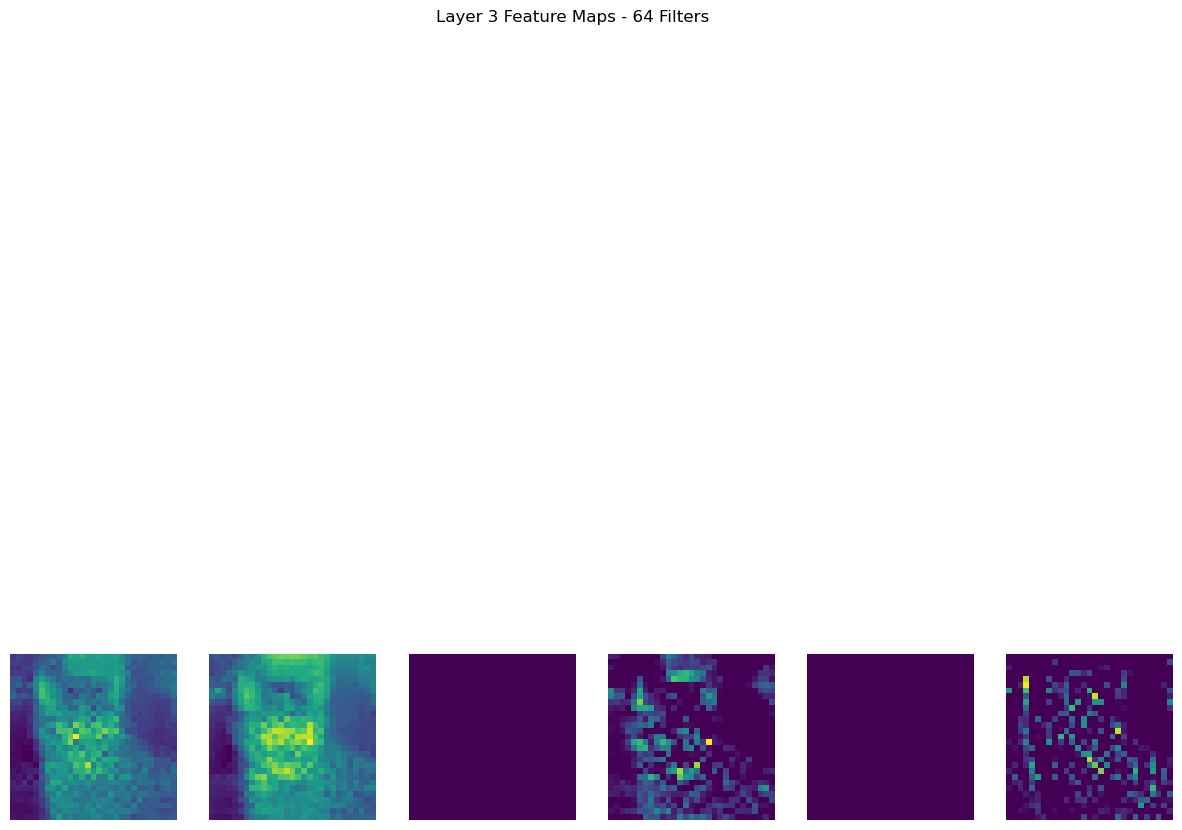

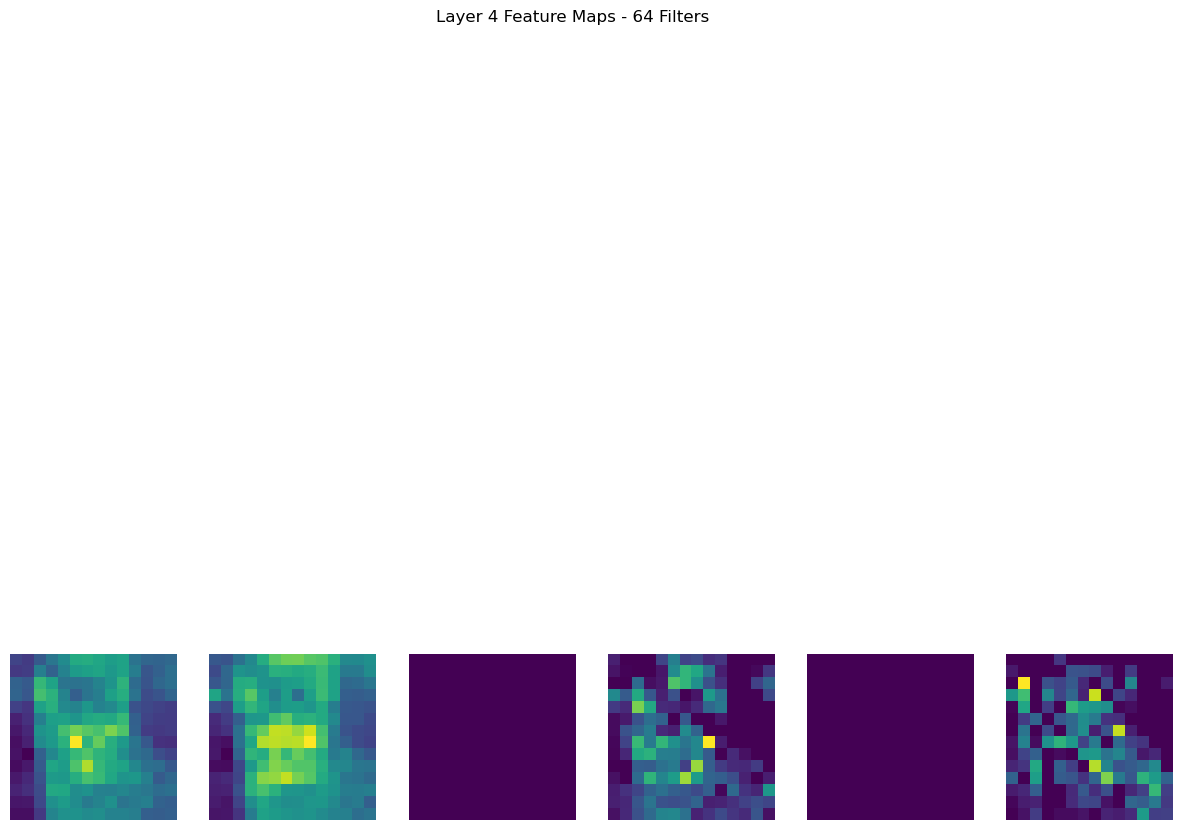

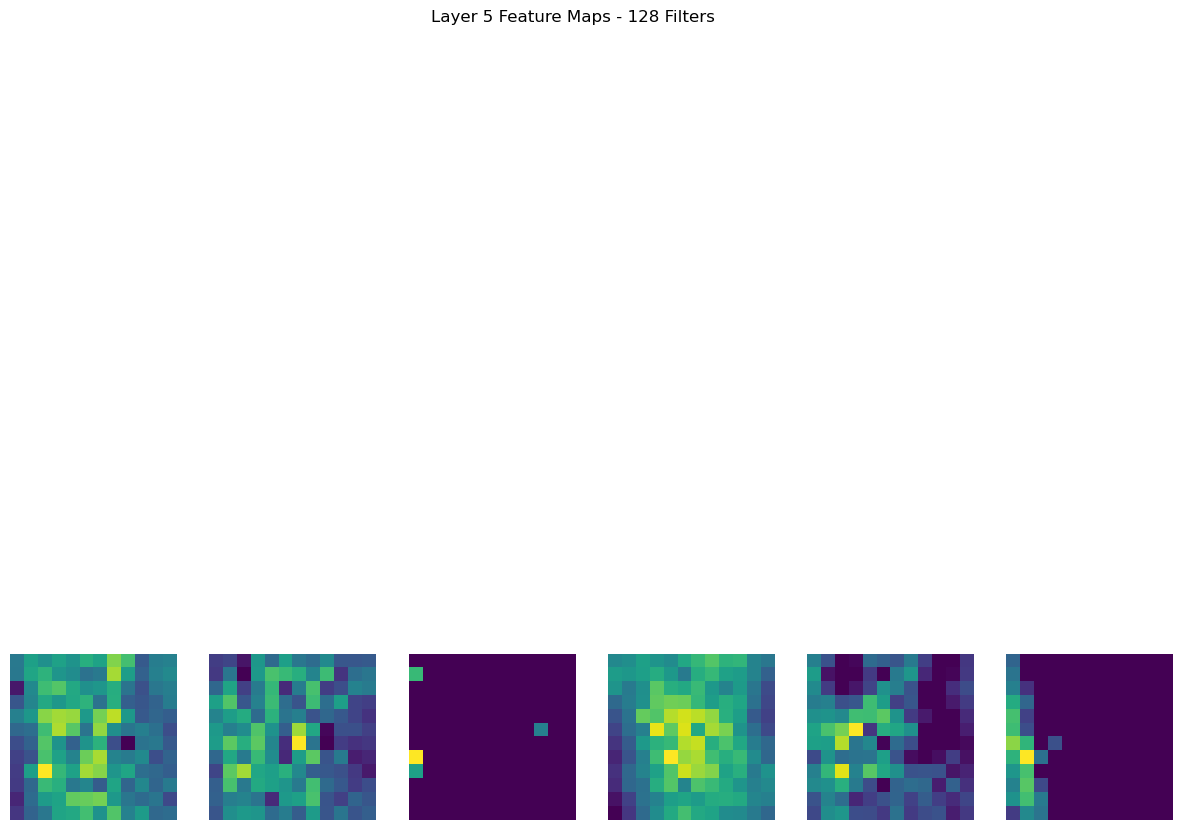

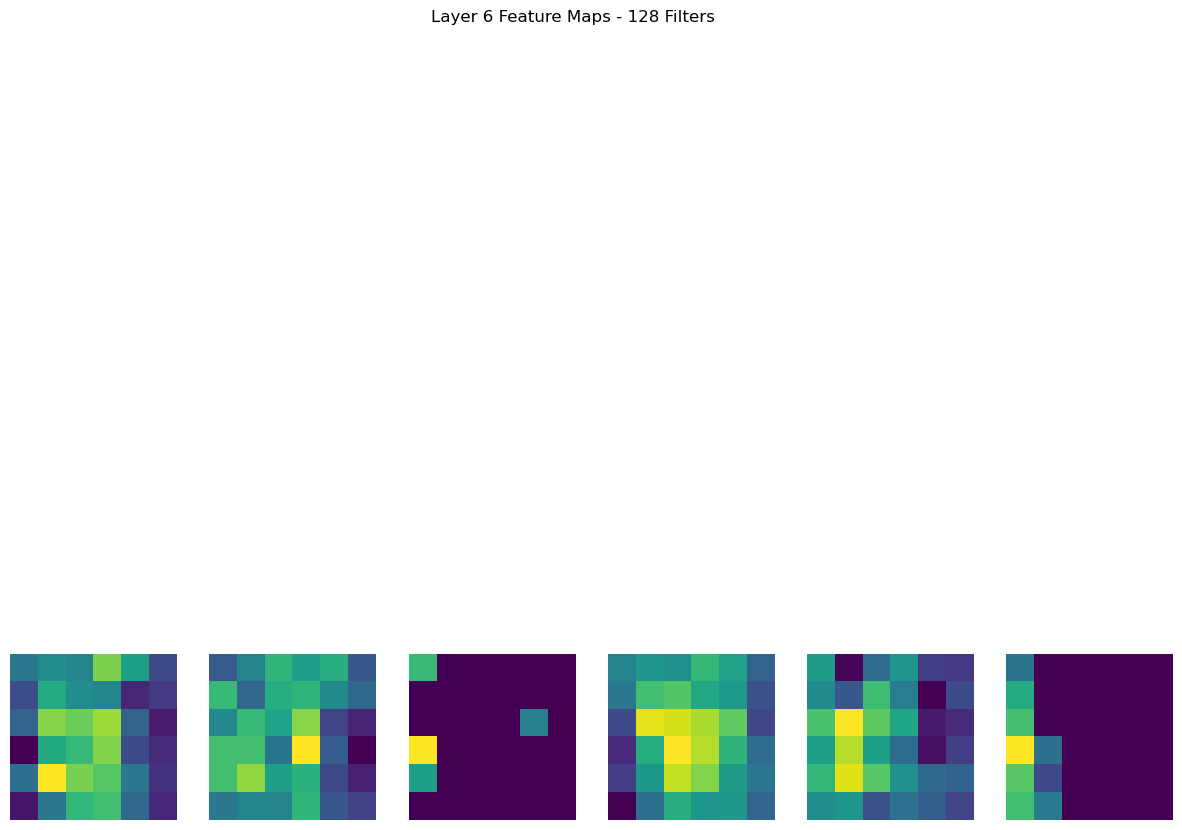

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Define the model with the Functional API
input_tensor = Input(shape=(64, 64, 3))  # Explicit input tensor
x = Conv2D(32, (3, 3), activation='relu')(input_tensor)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_tensor = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

# Verify the model structure
model.summary()

# Load a sample image
img_path = r"C:\Users\71591\Desktop\dataset\training_set\cats\cat.1.jpg"  # Replace with a valid path
img = load_img(img_path, target_size=(64, 64))  # Resize to model input size
img_array = img_to_array(img) / 255.0           # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)   # Add batch dimension

# Create a model that outputs intermediate layer activations
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
intermediate_model = Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps for the input image
feature_maps = intermediate_model.predict(img_array)

# Visualize the input image
plt.figure(figsize=(4, 4))
plt.imshow(img_array[0])
plt.title("Input Image")
plt.axis("off")
plt.show()

# Visualize feature maps
for layer_index, feature_map in enumerate(feature_maps):
    n_filters = feature_map.shape[-1]  # Number of filters
    size = feature_map.shape[1]        # Spatial size (height/width)

    # Plot up to 6 feature maps from this layer
    fig, axes = plt.subplots(1, min(n_filters, 6), figsize=(15, 15))
    fig.suptitle(f"Layer {layer_index + 1} Feature Maps - {n_filters} Filters")

    for i in range(min(n_filters, 6)):  # Display up to 6 filters
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')  # Display the feature map for filter i
        ax.axis("off")

    plt.show()


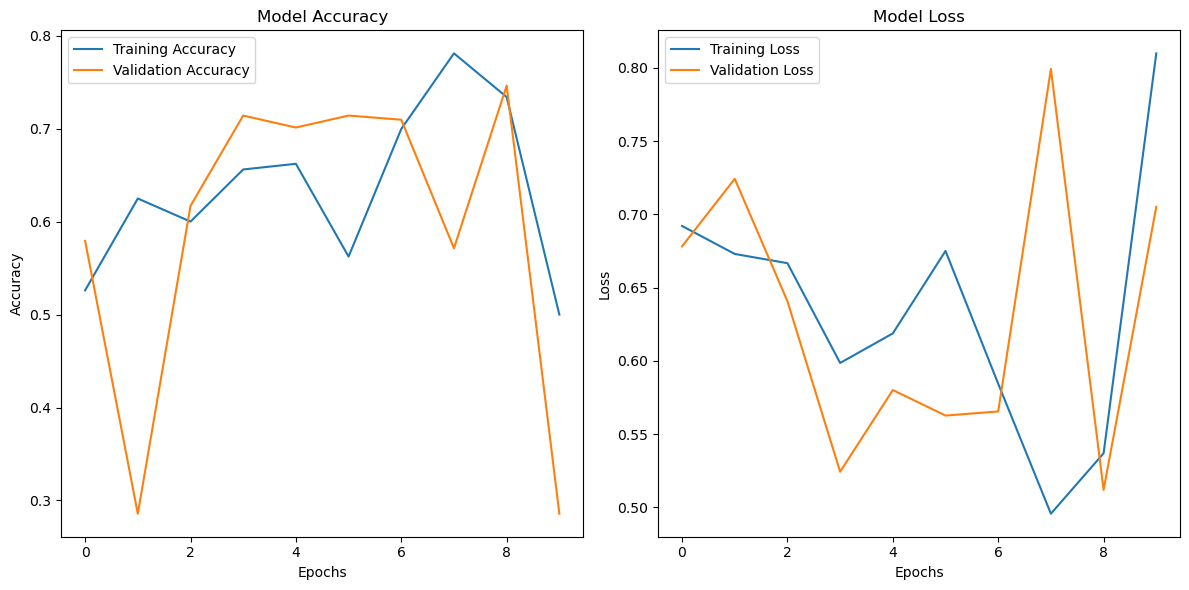

In [9]:
# Visualize training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


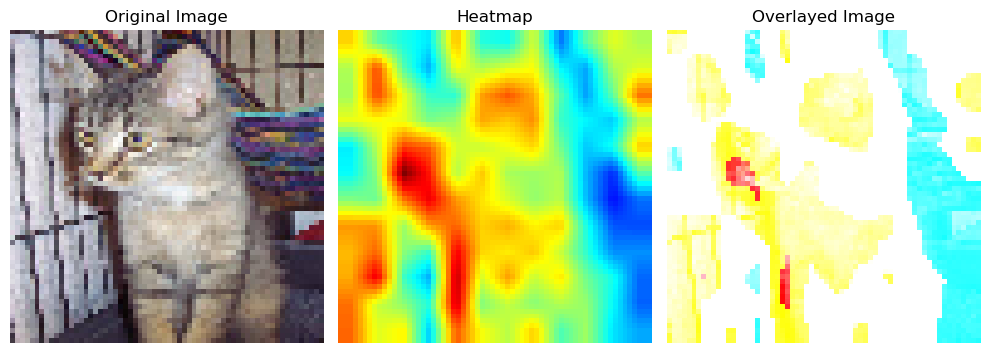

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to generate CAM
def generate_cam(model, img_path, class_index=None):
    # Load the image and preprocess
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get the last convolutional layer
    last_conv_layer = [layer for layer in model.layers if 'conv' in layer.name][-1]

    # Create a model that outputs the last conv layer and the final output
    grad_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

    # Get feature maps and predictions
    conv_output, predictions = grad_model.predict(img_array)
    if class_index is None:
        class_index = np.argmax(predictions[0])  # Predicted class

    # Get the weights of the final dense layer
    weights = model.layers[-1].get_weights()[0][:, class_index]

    # Compute the weighted sum of feature maps
    cam = np.dot(conv_output[0], weights)

    # Resize the heatmap to match the input image size
    cam = cv2.resize(cam, (64, 64))
    cam = np.maximum(cam, 0)  # Apply ReLU
    cam = cam / cam.max()  # Normalize to [0, 1]

    # Overlay the heatmap on the input image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Combine heatmap with the original image
    overlayed_image = heatmap * 0.4 + img_array[0]

    return img_array[0], heatmap, overlayed_image

# Path to the sample image
img_path = r"C:\Users\71591\Desktop\dataset\training_set\cats\cat.2.jpg"  # Replace with a valid image path

# Generate CAM
original_img, heatmap, overlayed_img = generate_cam(model, img_path)

# Visualize the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(heatmap)
plt.title("Heatmap")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(overlayed_img)
plt.title("Overlayed Image")
plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


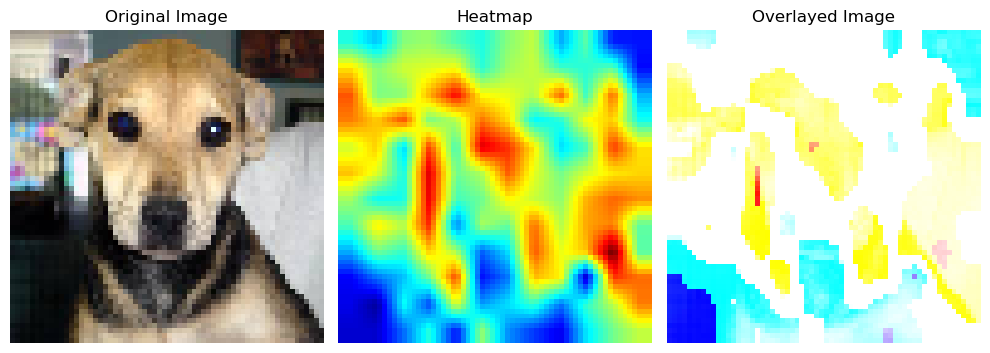

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Function to generate CAM
def generate_cam(model, img_path, class_index=None):
    # Load the image and preprocess
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Get the last convolutional layer
    last_conv_layer = [layer for layer in model.layers if 'conv' in layer.name][-1]

    # Create a model that outputs the last conv layer and the final output
    grad_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

    # Get feature maps and predictions
    conv_output, predictions = grad_model.predict(img_array)
    if class_index is None:
        class_index = np.argmax(predictions[0])  # Predicted class

    # Get the weights of the final dense layer
    weights = model.layers[-1].get_weights()[0][:, class_index]

    # Compute the weighted sum of feature maps
    cam = np.dot(conv_output[0], weights)

    # Resize the heatmap to match the input image size
    cam = cv2.resize(cam, (64, 64))
    cam = np.maximum(cam, 0)  # Apply ReLU
    cam = cam / cam.max()  # Normalize to [0, 1]

    # Overlay the heatmap on the input image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Combine heatmap with the original image
    overlayed_image = heatmap * 0.4 + img_array[0]

    return img_array[0], heatmap, overlayed_image

# Path to the sample image
img_path = r"C:\Users\71591\Desktop\dataset\training_set\dogs\dog.4.jpg"  # Replace with a valid image path

# Generate CAM
original_img, heatmap, overlayed_img = generate_cam(model, img_path)

# Visualize the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(heatmap)
plt.title("Heatmap")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(overlayed_img)
plt.title("Overlayed Image")
plt.axis("off")

plt.tight_layout()
plt.show()
